In [1]:
%matplotlib inline
# This is a simulation that demonstrates the difference between kNN and Linear Models
# Case 2: If the data can be viewed as mixture of low variance distributions

In [2]:
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import random
random.seed(5001)

In [3]:
def rd():
    ans = random.normalvariate(0,5)
    return ans

In [4]:
cov_pos = [[1,0],[0,1]]
mean_pos = [2,3]
x_pos = np.random.multivariate_normal(mean_pos, cov_pos, 0)

for _ in range(10):
    tempx = np.random.multivariate_normal([rd(), rd()], cov_pos, 10)
    x_pos = np.concatenate((x_pos, tempx))

xs_pos = [i[0] for i in x_pos]
ys_pos = [i[1] for i in x_pos]

print (max(xs_pos))
mean_neg = [-2,3]
cov_neg = [[1,0],[0,1]]
x_neg = np.random.multivariate_normal(mean_neg, cov_neg, 0)

for _ in range(10):
    tempx = np.random.multivariate_normal([rd(), rd()], cov_pos, 10)
    x_neg = np.concatenate((x_neg, tempx))


xs_neg = [i[0] for i in x_neg]
ys_neg = [i[1] for i in x_neg]

6.785755994174732


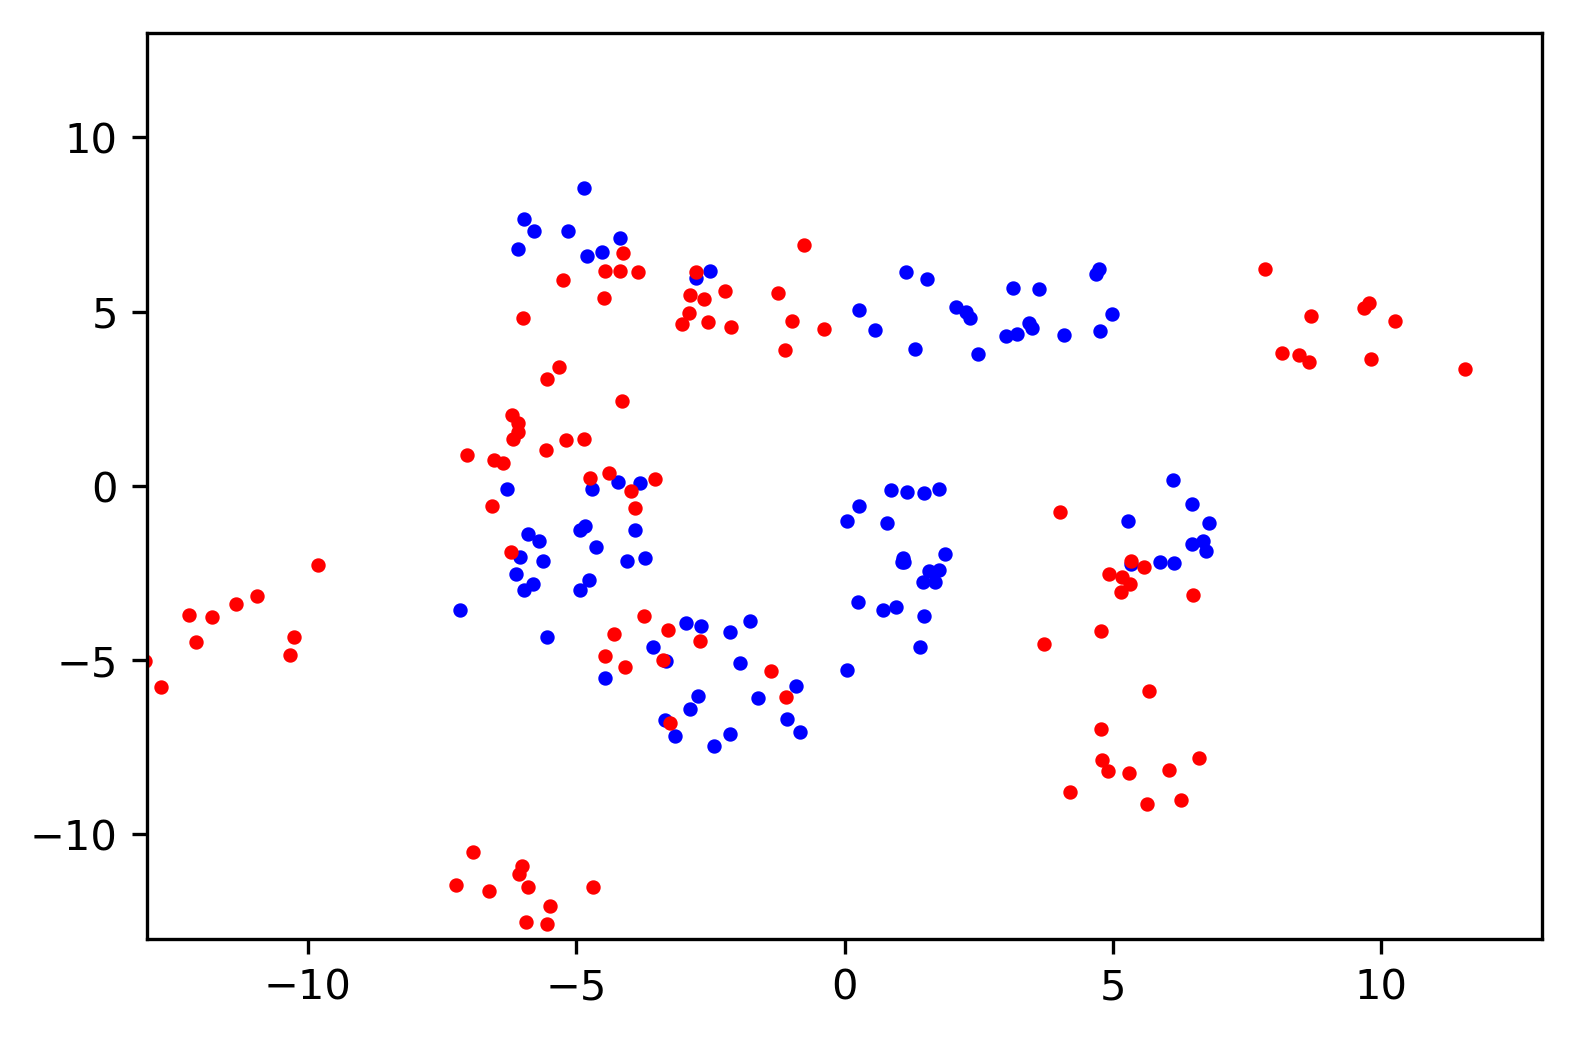

In [5]:
plt.figure(dpi=300)
plt.xlim(-13,13)
plt.ylim(-13,13)
dot_size = 6
plt.scatter(xs_pos, ys_pos, color='blue',s=dot_size)
plt.scatter(xs_neg, ys_neg, color='red',s=dot_size)

In [6]:
data = np.concatenate((x_pos,x_neg),axis=0)
label = []
for _ in range(100):
    label.append(1)
for _ in range(100):
    label.append(0)

In [7]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="log",tol=0.001)
clf.fit(data,label)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=0.001, verbose=0, warm_start=False)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
n_clf = KNeighborsClassifier(n_neighbors=5)
n_clf.fit(data,label)

X=data
y=label
h=0.02
x_min, x_max = -13,13#X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = -13,13#X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

from matplotlib.colors import ListedColormap
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


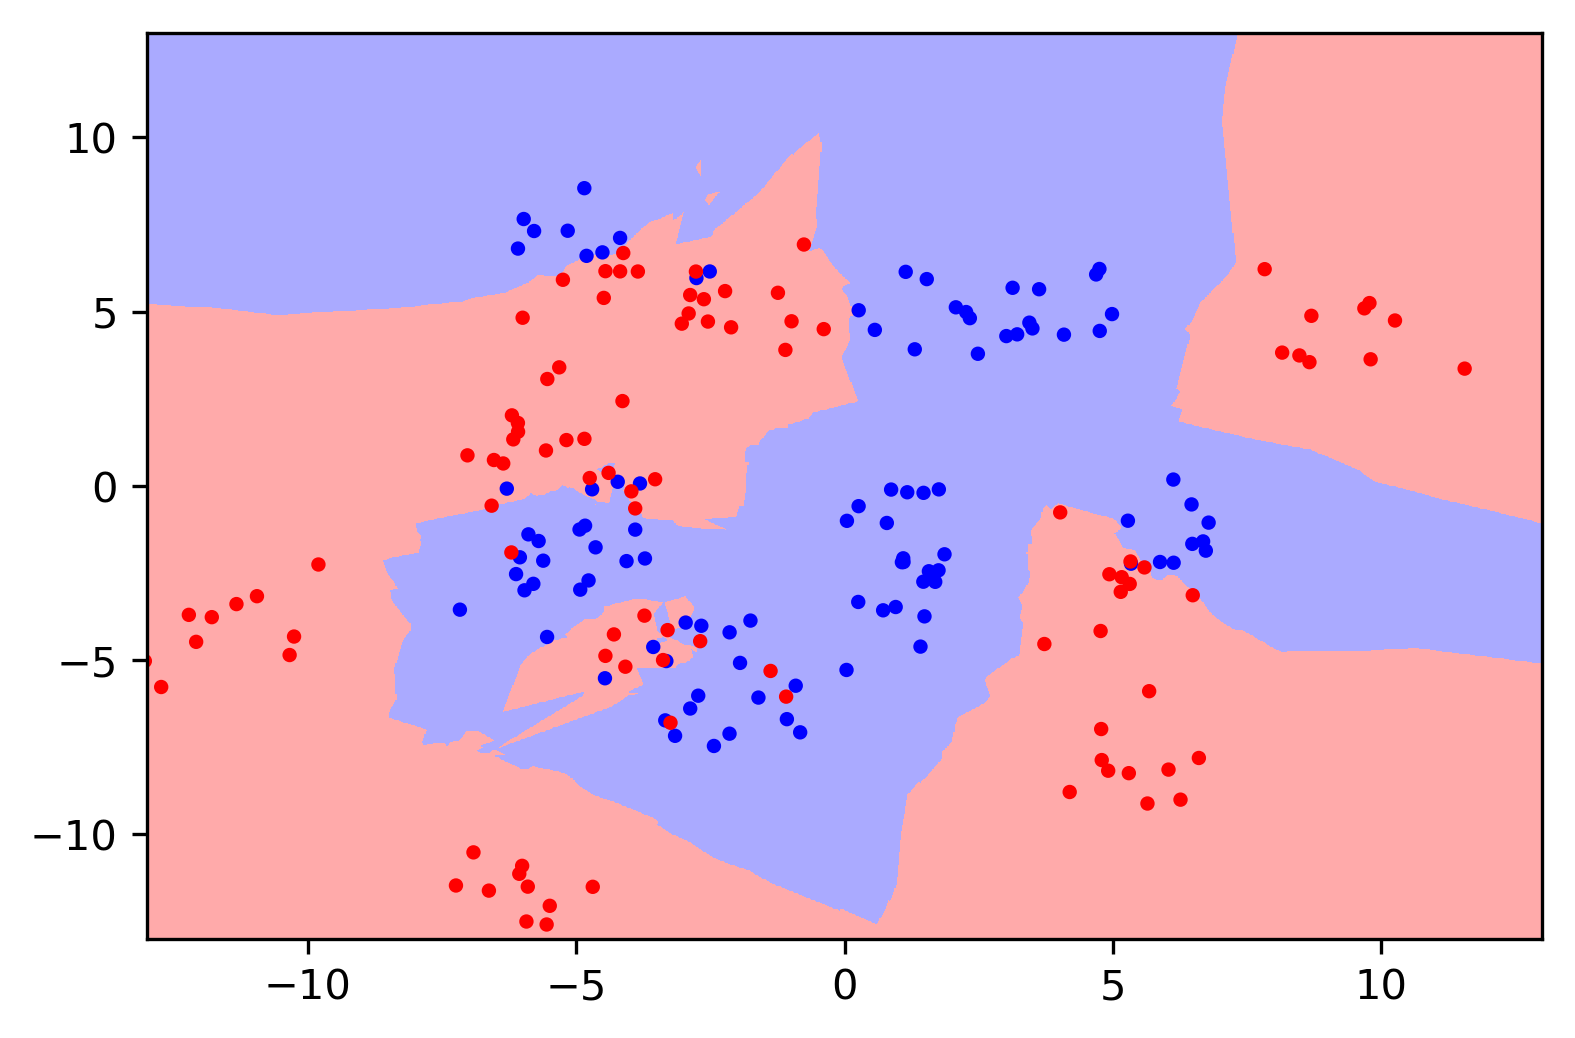

In [9]:
Z = n_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(dpi=300)
plt.xlim(-13,13)
plt.ylim(-13,13)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=6)

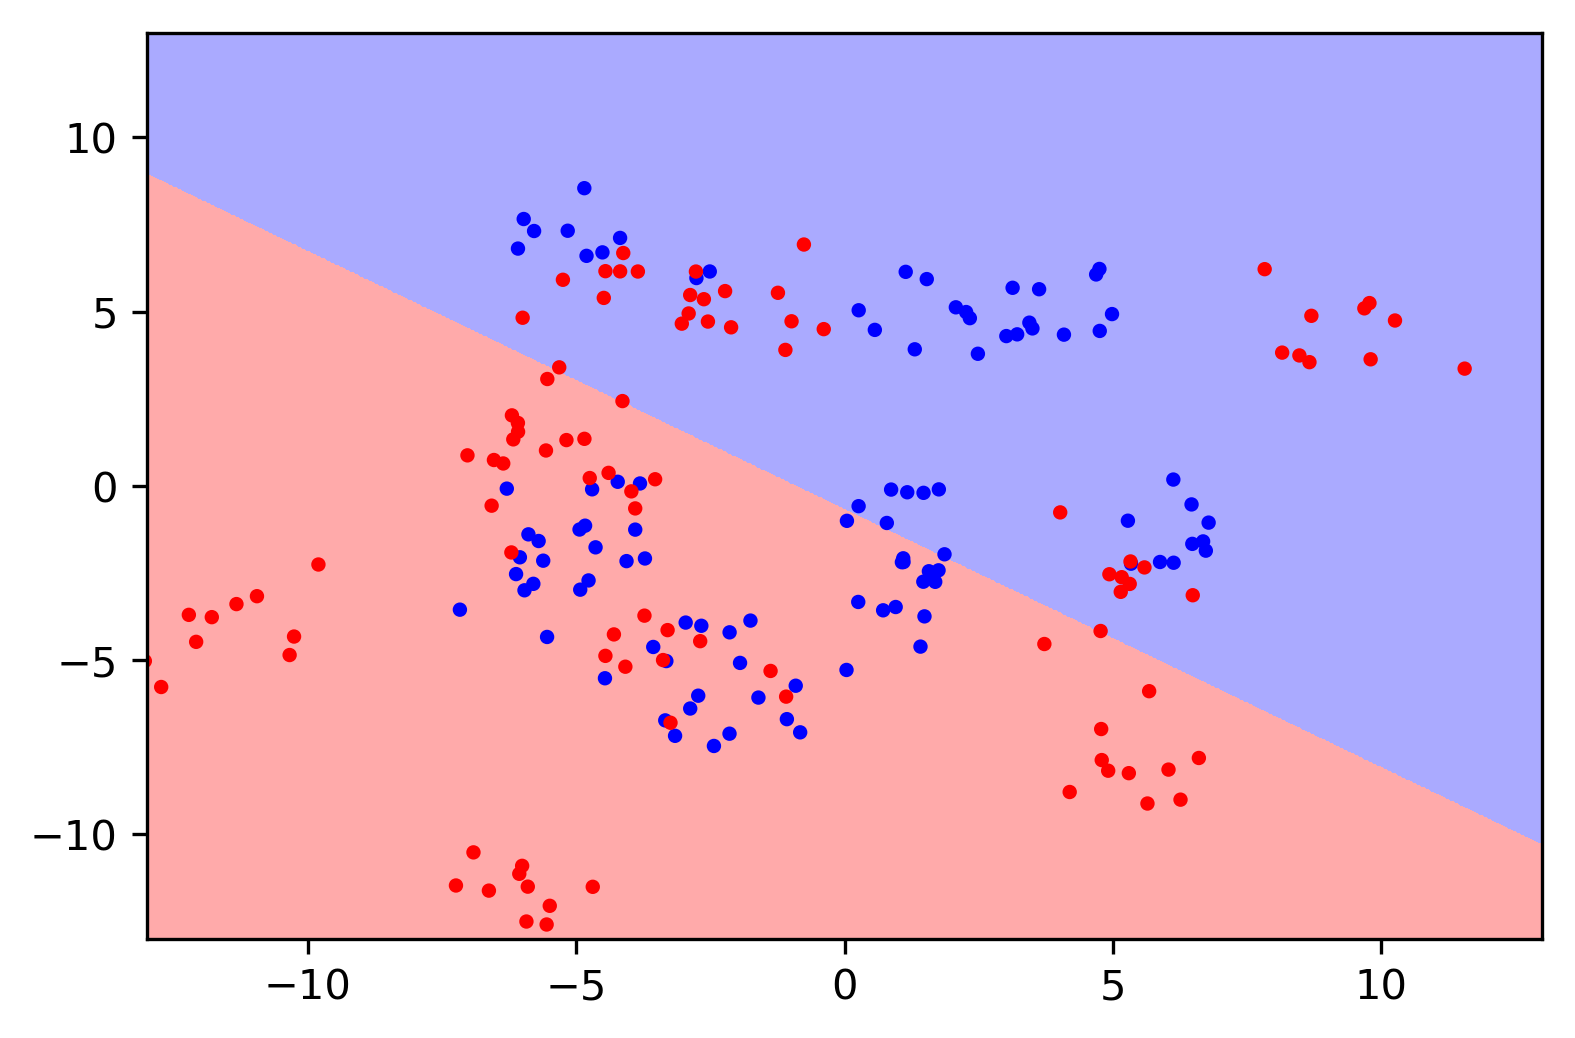

In [10]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(dpi=300)
plt.xlim(-13,13)
plt.ylim(-13,13)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=6)